In [1]:
#Shishir Khanal
#CMU-Optimal Controls from Jack Manchester
#Minimization: Equality Constraints

In [1]:
import Pkg;
Pkg.activate(@__DIR__);
Pkg.instantiate();

Pkg.add("LinearAlgebra");
Pkg.add("PyPlot");
Pkg.add("ForwardDiff");

using LinearAlgebra;
using PyPlot;
using ForwardDiff;

  Activating project at `~/Documents/Optimal_Control/Sims/Optimization/Constrained_Minimization`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Constrained_Minimization/Project.toml`
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Constrained_Minimization/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Constrained_Minimization/Project.toml`
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Constrained_Minimization/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Constrained_Minimization/Project.toml`
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Constrained_Minimization/Manifest.toml`


In [2]:
Q = Diagonal([0.5; 1])
#Quadratic Objective Function
function f(x)
    return 0.5*(x-[1; 0])'*Q*(x-[1; 0])
end

function ∇f(x)
    return Q*(x-[1; 0])
end

function ∇2f(x)
    return Q
end

∇2f (generic function with 1 method)

In [3]:
#Quadratic Constraint
function c(x)
    return x[1]^2 + 2*x[1] - x[2]
end

#Jacobian of Constraint
function δc(x)
    return [2*x[1]+2 -1]
end

δc (generic function with 1 method)

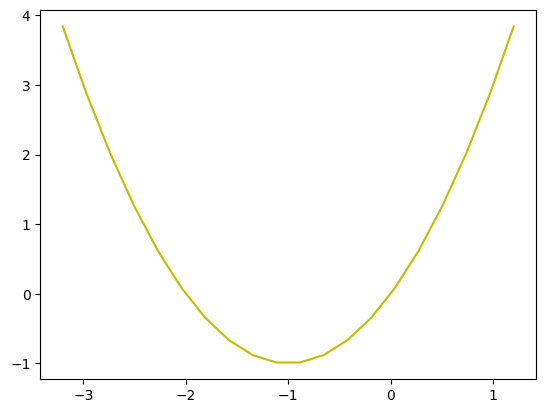

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e98d83eb0>

In [4]:
function plot_landscape()
    Nsamp = 20
    Xsamp = kron(ones(Nsamp), LinRange(-4,4,Nsamp)')
    Ysamp = kron(ones(Nsamp)', LinRange(-4,4,Nsamp))
    Zsamp = zeros(Nsamp, Nsamp)
    for j = 1:Nsamp
        for k = 1:Nsamp
            Zsamp[j,k] = f([Xsamp[j,k]; Ysamp[j,k]])
        end
    end
    #positive definite hessian so level curve looks like a bowl
    #contour(Xsamp, Ysamp, Zsamp)
    
    xc = LinRange(-3.2, 1.2, Nsamp)
    #Quadratic Equality Constraint
    plot(xc, xc.^2 + 2.0.*xc, "y")
end

plot_landscape()

In [5]:
function newton_step(x0,λ0)
    #Compute δc(x)'*λ0, evaluate its jacobian and evaluate Hessian
    H = ∇2f(x0) + ForwardDiff.jacobian(x -> δc(x)'*λ0, x0)
    C = δc(x0)
    Δz = [H C'; C 0]\[-∇f(x0)-C'*λ0; -c(x0)]
    Δx = Δz[1:2]
    Δλ = Δz[3]
    return x0+Δx, λ0+Δλ
end

newton_step (generic function with 1 method)

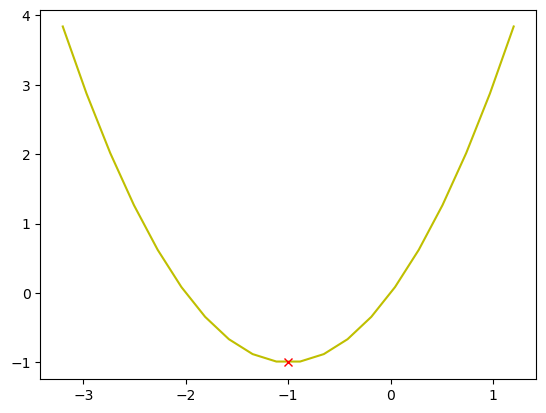

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e894e2760>

In [6]:
xguess = [-1;-1]
λguess = [0.0]
plot_landscape()
plot(xguess[1], xguess[2], "rx")

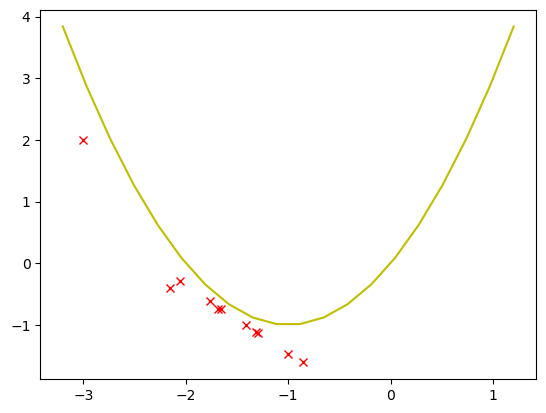

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e86acbf40>

In [21]:
#Minimize the function along the tangent plane
xnew, λnew = newton_step(xguess[:,end],λguess[end])
xguess = [xguess xnew]
λguess = [λguess λnew]
plot_landscape()
plot(xguess[1,:], xguess[2,:], "rx")

In [22]:
#Contains negative eigenvalues
#even if the objective is nice and convex, the constraint curvature term added to the Hessian
# for full newton can make Hessian of your KKT system become indefinite and have negative eigenvalues 
H = ∇2f(xguess[:,end]) + ForwardDiff.jacobian(x -> δc(x)'*λguess[end],xguess[:,end])

2×2 Matrix{Float64}:
 -1.75818  0.0
  0.0      1.0

In [23]:
function gauss_newton_step(x0, λ0)
    H = ∇2f(x0)
    C = δc(x0)
    Δz = [H C' ; C 0]\[-∇f(x0)-C'*λ0; -c(x0)]
    Δx = Δz[1:2]
    Δλ = Δz[3]
    return x0+Δx, λ0+Δλ
end

gauss_newton_step (generic function with 1 method)

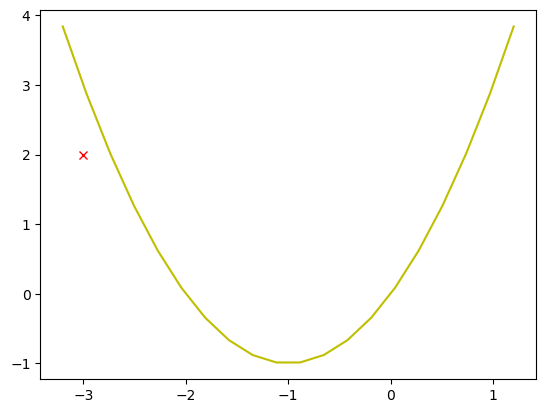

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e83690d60>

In [34]:
xguess = [-3; 2]
λguess = [0.0]
plot_landscape()
plot(xguess[1], xguess[2], "rx")

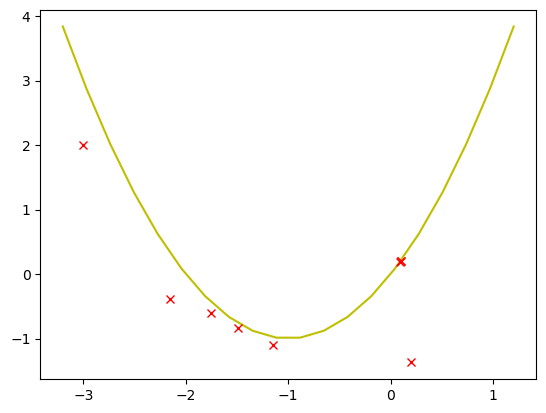

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e83315af0>

In [42]:
#
xnew, λnew = gauss_newton_step(xguess[:,end], λguess[end])
xguess = [xguess xnew]
λguess = [λguess λnew]
plot_landscape()
plot(xguess[1,:], xguess[2,:],"rx")